<h2>Transformations in Matplotlib</h2>

<p>In Matplotlib there are four different coordinate spaces that are available. The most obvious, and most used, is the data coordinate system. This is where your data are being plotted. So if you are plotting a sin curve, your data will be in a coordinate system that likely has the limits 0.0 to 1.0, or a little beyond this.Matplotlib calls this the userland coordinatesystem. It is controlled by the xlim and ylim properties. These may be determined automatically or set by you (the user) through the <code>set_xlim()</code> and <code>set_ylim() </code>functions</p>
<p>The Axes coordinate system refers to the axes space of your plot, or subplot. If you have only one plot, the origin of the coordinate system is the bottom left-hand side (0,0) of your axes. The top right corner is (1.0,1.0). If you have multiple plots or subplots (say, four panels) then each subplot axes has its own origin in the bottom left-hand side at 0.0. You can move outside to the left by supplying negative values, or further to the right by using greater than 1.0 values. Same for the top and the bottom.</p>


<table>
<tr><td>Coordinate</td><td>Transformation Object</td></tr>
<tr><td>data</td><td>ax.transData</td></tr>
<tr><td>axes</td><td>ax.transAxes</td></tr>
<tr><td>figure</td><td>fig.transFigure</td></tr>
<tr><td>display</td><td>None</td></tr>
</table>

<h3>Some Examples</h3>

<p>Some examples may help clarify these two transformations. Let's look at the data coordinate system first. As always you will need to import the <code>matplotlib.pyplot</code> library. We will also use numpy to generate some data for us</p>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<p>Create some data for the <i>x</i> and <i>y</i> axes.

In [11]:
x = np.arange(0,1,.005) #values from 0 to 5 at .005 intervals
y = np.cos(2.0*x*np.pi) #convert the x values to cosine for a nice curve

<p>Now we can plot the values as a figure for a single subplot. First we will get the figure object and store it as a variable <code>fig</code>. Then get the axes object, called <code>ax</code>. Finally, use the <code>ax.plot</code> method to plot a line.</p>

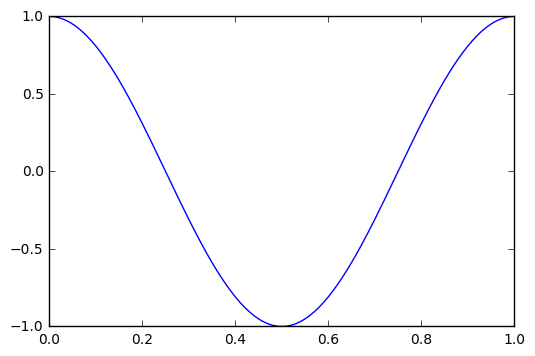

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)

<p>Matplotlib automatically selects the bounds of the data coordinates to fit the data. These can be changed by accessing the <code>set_xlim()</code> and <code>set_ylim() </code>functions. Say we want to make sure there is some space in the top and bottom of the graph.</p>

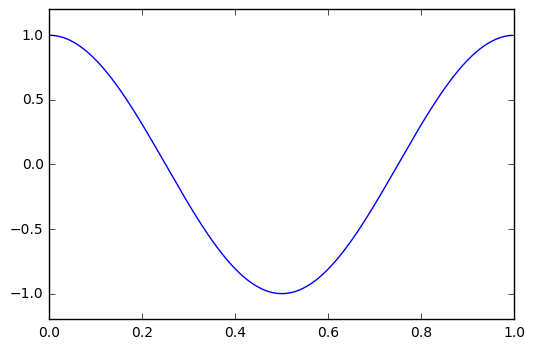

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(0, 1.0)
ax.set_ylim(-1.2, 1.2)
ax.plot(x, y)

<p>If we want to convert the data coordinates into display coordinates, we can use the <code>ax.transData.transform()</code> function to do this. We can also go backwards and get the data coordinates from display coordinates.</p>
<p>First, we will set new figure to exact pixel dimensions (1200x1200 at 300 dpi) so we can better now where the display and data coordinates are intersecting. Let's also plot a point to be sure where it goes</p>

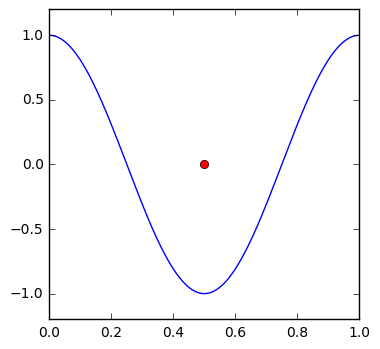

In [17]:
fdpi = 300
fig = plt.figure(figsize=(1200/fdpi, 1200/fdpi), dpi=fdpi)
ax = fig.add_subplot(111)
ax.set_xlim(0, 1.0)
ax.set_ylim(-1.2, 1.2)
ax.plot(x, y)
ax.plot(.5,0.0,'ro') #plot a red point at x=.5 and y=0

<p>For the most part, this point is at the center of our data coordinate system, so we would expect it to be about the center of the display coordinates. Let's apply the transformation to find out.</p>

In [18]:
print(ax.transData.transform((.5,0)))

[ 615.  615.]


<p>The value is close to half of 1200, but because we have the axes to consider, it is 15 pixels more in both the width and height. Now if we go in the opposite direction we can see that we should get the same values as the red point</p>

In [20]:
invax = ax.transData.inverted()
print(invax.transform((615,615)))

[  5.00000000e-01   2.22044605e-16]


<p>If you recall your scientific notation, then the first value is .5. The second value is close to zero</p>

<p>Now we will experiment with the axes coordinate system. We will add a label according using the axes coordinates. As you recall, the origin is in the lower left corner. We will add a label in the lower left and upper right to show where these are placed in the figure.</p>

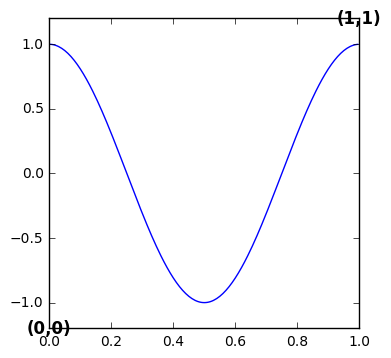

In [22]:
fdpi = 300
fig = plt.figure(figsize=(1200/fdpi, 1200/fdpi), dpi=fdpi)
ax = fig.add_subplot(111)
ax.set_xlim(0, 1.0)
ax.set_ylim(-1.2, 1.2)
ax.plot(x, y)
ax.text(0.0,0.0,"(0,0)",transform=ax.transAxes,fontsize=12,fontweight='bold',
       ha='center',va='center')
ax.text(1.0,1.0,"(1,1)",transform=ax.transAxes,fontsize=12,fontweight='bold',
       ha='center',va='center')

<p>The code is nearly the same, except at the bottom to pieces of text are being added. The first three arguments are: the x coordinate, y coordinate, and text string. The first piece of text is added at the origin, and the second at the top right-hand corner. The <code>transform</code> argument is added to specify which coordinate system the <i>x</i> and <i>y</i> coordinates are in. In both cases it is set to the axes coordinate system. Two properties for the text (<code>fontsize</code>and<code>fontweight</code>) are added to help distinguish the added text from the axes labels. The horizontal and vertical alignments are set to zero, so the center of the text is placed exactly on the <i>x</i> and <i>y</i> coordinates.</p>
<p>So what happens now when we add more panels to the figure? We need to make sure we specify which axes the text is associated with. Let's convert this to a loop to create four subplots. We can use the same data in each. We'll also double the height and width of the figure to make it a little more roomy.</p>

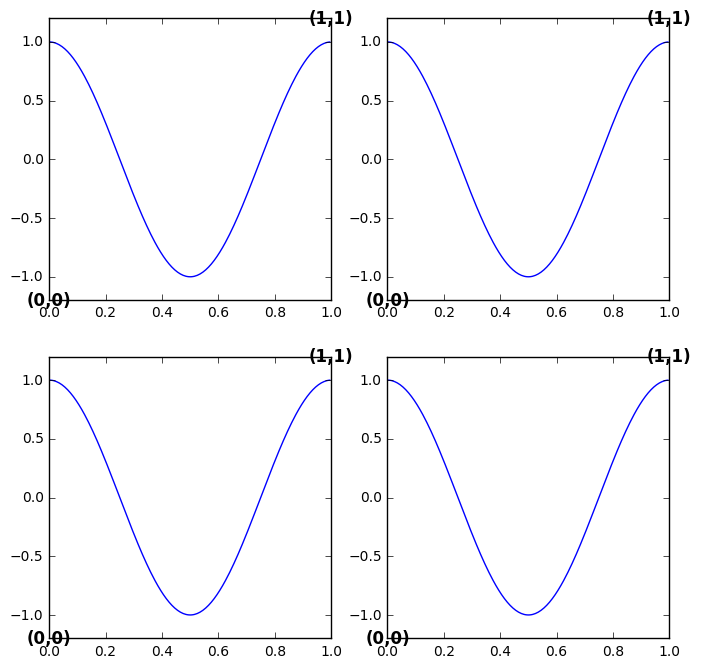

In [23]:
fdpi = 300
fig = plt.figure(figsize=(2400/fdpi, 2400/fdpi), dpi=fdpi)
for i in range(1,5):
    ax = fig.add_subplot(2,2,i)
    ax.set_xlim(0, 1.0)
    ax.set_ylim(-1.2, 1.2)
    ax.plot(x, y)
    ax.text(0.0,0.0,"(0,0)",transform=ax.transAxes,fontsize=12,fontweight='bold',
           ha='center',va='center')
    ax.text(1.0,1.0,"(1,1)",transform=ax.transAxes,fontsize=12,fontweight='bold',
           ha='center',va='center')

<p>Another approach may be that we want to highlight a specific region of our plot, but do not know the data coordinates. We could use the transform as above to go between display and data coordinates. We could also plot directly onto our  axes coordinate system. In this case, let's use a circle to call out a portion of our cosine line. First we need to import another class from matplotlib called patches. Patches are like polygons. We'll use a circle patch.<p>

In [24]:
import matplotlib.patches as patches

<p>Then back to the single subplot figure we have been working with.</p>

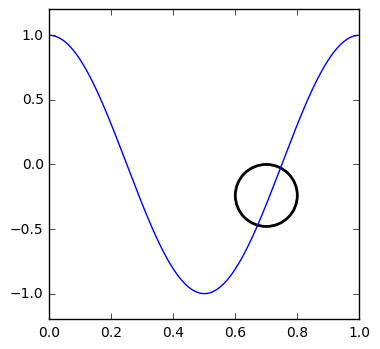

In [26]:
fdpi = 300
fig = plt.figure(figsize=(1200/fdpi, 1200/fdpi), dpi=fdpi)
ax = fig.add_subplot(111)
ax.set_xlim(0, 1.0)
ax.set_ylim(-1.2, 1.2)
ax.plot(x, y)
circ = patches.Circle((0.7, 0.4), 0.1, transform=ax.transAxes,
                      facecolor='none', edgecolor='k',linewidth=2.0)
ax.add_patch(circ)

<p>The circle is added at axes coordinates x=.7 and y=.4. That is .7 units from the left, and .4 units from the bottom. The transform is set to <code>ax.transAxes</code> to make sure we are drawing using the axes coordinates</p>
<p>What about the case where we know the range of values we want to use in the data coordinates for one axis, and want to use axes coordinates for the other axis. In this case, we can use a blended transform to set this up. We need import another class for this.</p>

In [27]:
import matplotlib.transforms as transforms

<p>Then we need to create a blended transform factory that will be initialized using the two transformations we want:<code>transData</code> and <code>transAxes</code>. Again, we will use a patch, but a rectangle patch in this case. The <i>x</i> and <i>y</i> coordinates are for the lower left-hand corner of the rectangle. The width and <i>x</i> coordinate use the <code>transData</code> function, and the height and <i>y</i> coordinate use the <code>transAxes</code> function.</p>


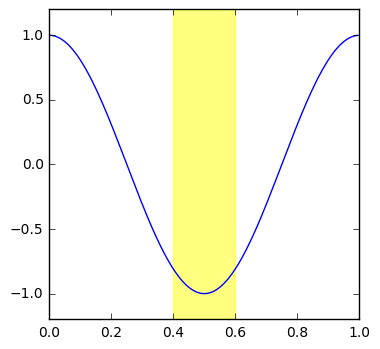

In [32]:
fdpi = 300
fig = plt.figure(figsize=(1200/fdpi, 1200/fdpi), dpi=fdpi)
ax = fig.add_subplot(111)
ax.set_xlim(0, 1.0)
ax.set_ylim(-1.2, 1.2)
ax.plot(x, y)
trans = transforms.blended_transform_factory(
    ax.transData, ax.transAxes)
rect = patches.Rectangle((0.4,0), width=.2, height=1,
                         transform=trans, color='yellow',
                         alpha=0.5)
ax.add_patch(rect)

<p>The axes coordinates run from 0 to 1. We can specify the <i>y</i> coordinate as zero for the bottom, and the height as 1 to go all the way to the top. If we used data coordinates to figure this we would have to know the ylim to achieve the same effect. Then anytime the ylim changed this would need to be changed to reflect it. It is much easier to use the axes coordinate to fill this space.</p>

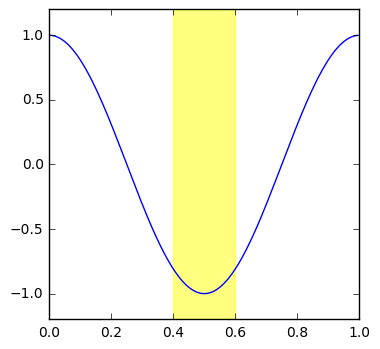

In [34]:
fdpi = 300
fig = plt.figure(figsize=(1200/fdpi, 1200/fdpi), dpi=fdpi)
ax = fig.add_subplot(111)
ax.set_xlim(0, 1.0)
ax.set_ylim(-1.2, 1.2)
ax.plot(x, y)
rect = patches.Rectangle((0.4,-1.2), width=.2, height=2.4,
                         transform=ax.transData, color='yellow',
                         alpha=0.5)
ax.add_patch(rect)

<h3>Figure Transform</h3>
<h4>Legends Placement</h4>

<p>The other transform is the figure transform. Again, the origin is the lower left-hand corner of the figure (0,0). The top right of the figure is (1,1). Let's use <code>transFigure</code> to demonstrate</p>

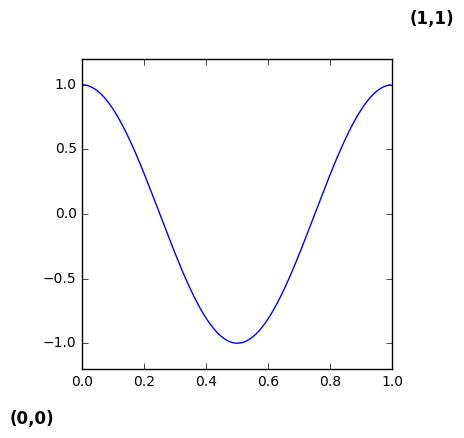

In [36]:
fdpi = 300
fig = plt.figure(figsize=(1200/fdpi, 1200/fdpi), dpi=fdpi)
ax = fig.add_subplot(111)
ax.set_xlim(0, 1.0)
ax.set_ylim(-1.2, 1.2)
ax.plot(x, y)
ax.text(0.0,0.0,"(0,0)",transform=fig.transFigure,fontsize=12,fontweight='bold',
       ha='center',va='center')
ax.text(1.0,1.0,"(1,1)",transform=fig.transFigure,fontsize=12,fontweight='bold',
       ha='center',va='center')

<p>The figure includes the data area, and the axes. In a sense these coordinate systems are nested within each other. You can use transformations to move between them. Let's use <code>tight_layout()</code> to see how this changes the placement</p>

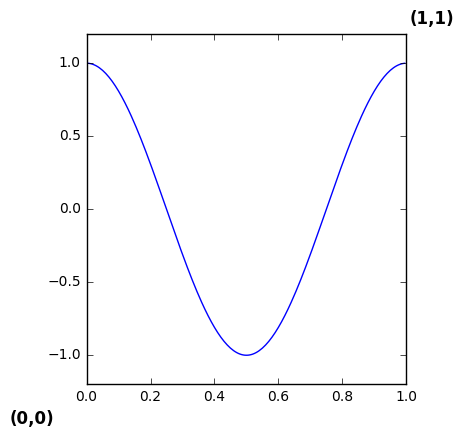

In [38]:
fdpi = 300
fig = plt.figure(figsize=(1200/fdpi, 1200/fdpi), dpi=fdpi)
ax = fig.add_subplot(111)
ax.set_xlim(0, 1.0)
ax.set_ylim(-1.2, 1.2)
ax.plot(x, y)
ax.text(0.0,0.0,"(0,0)",transform=fig.transFigure,fontsize=12,fontweight='bold',
       ha='center',va='center')
ax.text(1.0,1.0,"(1,1)",transform=fig.transFigure,fontsize=12,fontweight='bold',
       ha='center',va='center')
plt.tight_layout()

<p>One feature of matplotlib that often uses figure coordinates is the legend. Often, it is enough to use the default legend position provided through the loc parameter (see the table below). The default location is the upper right.</p>

<table>
<caption>Default Legend Positions Available in Matplotlib for the <code>loc</code> parameter</caption>
<tr><td>As String</td><td>As Integer</td></tr>
<tr><td>best</td><td>0</td></tr>
<tr><td>upper right</td><td>1</td></tr>
<tr><td>upper left</td><td>2</td></tr>
<tr><td>lower left</td><td>3</td></tr>
<tr><td>lower right</td><td>4</td></tr>
<tr><td>right</td><td>5</td></tr>
<tr><td>center left</td><td>6</td></tr>
<tr><td>center right</td><td>7</td></tr>
<tr><td>lower center</td><td>8</td></tr>
<tr><td>upper center</td><td>9</td></tr>
<tr><td>center</td><td>10</td></tr>
</table>
<p>source:<cite> https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend</cite></p>

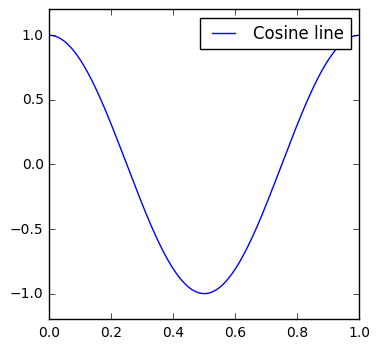

In [39]:
fdpi = 300
fig = plt.figure(figsize=(1200/fdpi, 1200/fdpi), dpi=fdpi)
ax = fig.add_subplot(111)
ax.set_xlim(0, 1.0)
ax.set_ylim(-1.2, 1.2)
ax.plot(x, y,label="Cosine line")
plt.legend()

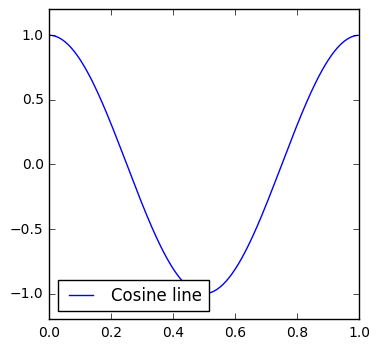

In [40]:
fdpi = 300
fig = plt.figure(figsize=(1200/fdpi, 1200/fdpi), dpi=fdpi)
ax = fig.add_subplot(111)
ax.set_xlim(0, 1.0)
ax.set_ylim(-1.2, 1.2)
ax.plot(x, y,label="Cosine line")
plt.legend(loc=3)

<p>When adding a legend, you can specify the <code>bbox_to_anchor</code> argument, the <code>bbox_transform</code> argument, and <code>loc</code> to really place the legend wherever you want. <code>loc</code> is like the alignment point of the text above. The default is the upper right corner of the legend bounding box. <code>bbox_to_anchor</code> is dependent on the transformation. It is the coordinates where the anchor (set by <code>loc</code> ) is going to be placed. <code>bbox_transform</code> tells matplotlib which transformation to apply, or which coordinate system to place the legend using.Confused? Let's visualize it.</p>
<p>The above figures use the location to specify the placement of the legend. Now let's leave the location as the upper right corner of the legend bounding box (default) but change the <code>bbox_to_anchor</code> parameter.

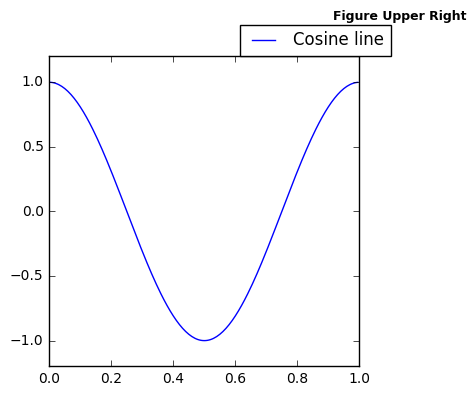

In [45]:
fdpi = 300
fig = plt.figure(figsize=(1200/fdpi, 1200/fdpi), dpi=fdpi)
ax = fig.add_subplot(111)
ax.set_xlim(0, 1.0)
ax.set_ylim(-1.2, 1.2)
ax.plot(x, y,label="Cosine line")
ax.text(1.0,1.0,"Figure Upper Right",transform=fig.transFigure,fontsize=9,fontweight='bold',
       ha='center',va='center')
plt.legend(bbox_to_anchor=(1.0, 1.0), bbox_transform=fig.transFigure)

<p>In the above figure the anchor is upper right, and the anchor point is set to 1.0,1.0. The transformation is the figure, and a piece of text is added there as well to show the upper right of the figure coordinate system.</p>
<p>Below, the location is set to the center of the legend, but the anchor and coordinate system are left as figure upper right</p>

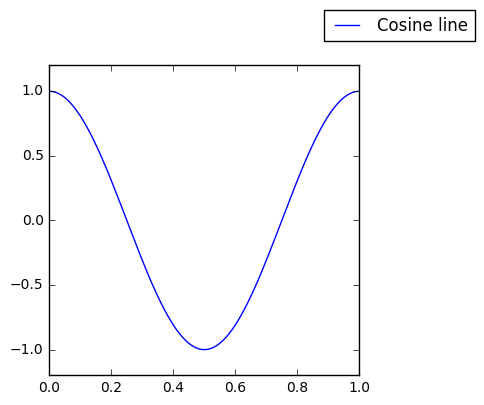

In [49]:
fdpi = 300
fig = plt.figure(figsize=(1200/fdpi, 1200/fdpi), dpi=fdpi)
ax = fig.add_subplot(111)
ax.set_xlim(0, 1.0)
ax.set_ylim(-1.2, 1.2)
ax.plot(x, y,label="Cosine line")

plt.legend(bbox_to_anchor=(1.0, 1.0), loc=10, bbox_transform=fig.transFigure)


<p>This allows for the placement at a wide range of places. Below we set the legend to outside the axes upper right corner, using the <code>loc</code> arguement set to two, or upper left. That is, the upper left of the <i>legend</i> bounding box.</p>
<p>In the first figure the transform is left as the figure coordinate. The second figure this property is left as the default axes coordinates. Also note the <code>bbox_to_anchor</code> is set slightly higher than 1. That is slightly outside the 0 to 1 bounds. This is odd for the figure coordinate system, but with the axes coordinate system you are saying you want to be just outside the axis line. <code>borderaxespad</code> is set to zero to make the legend fit closer to the axis edge.</p>

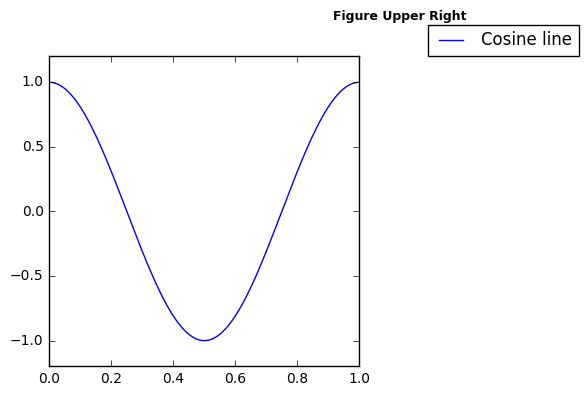

In [56]:
fdpi = 300
fig = plt.figure(figsize=(1200/fdpi, 1200/fdpi), dpi=fdpi)
ax = fig.add_subplot(111)
ax.set_xlim(0, 1.0)
ax.set_ylim(-1.2, 1.2)
ax.plot(x, y,label="Cosine line")
ax.text(1.0,1.0,"Figure Upper Right",transform=fig.transFigure,fontsize=9,fontweight='bold',
       ha='center',va='center')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2, bbox_transform=fig.transFigure)


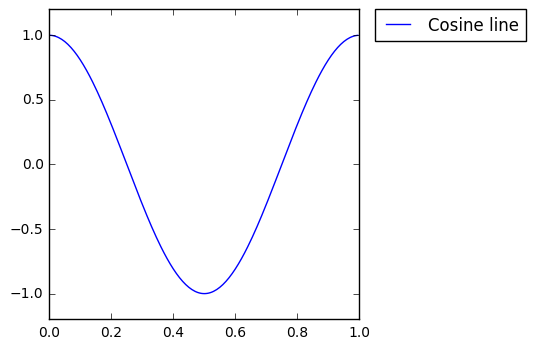

In [55]:
fdpi = 300
fig = plt.figure(figsize=(1200/fdpi, 1200/fdpi), dpi=fdpi)
ax = fig.add_subplot(111)
ax.set_xlim(0, 1.0)
ax.set_ylim(-1.2, 1.2)
ax.plot(x, y,label="Cosine line")

plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2,borderaxespad=0.)

<p>Say we wanted to place this below the bottom x-axis. We know we want to use the axes coordinate system, so we can leave this as default. We also probably want to fill the space at the bottom rather than leave the legend as we have. Now we need to specify four coordinates. We'll stick with the upper left anchor point for the legend box. Change the mode to "expand" to fill the space. Now we add our anchor locations. We'll use negative values to set slightly outside the axes. -.02 places the upper left at -.02 axes x coordinate. -.05 is axes y coordinate. 1.02 is the right side of the axes x coordinate. And the 0 in the 4th spot of the tuple is to stop the legend from going up.<p>

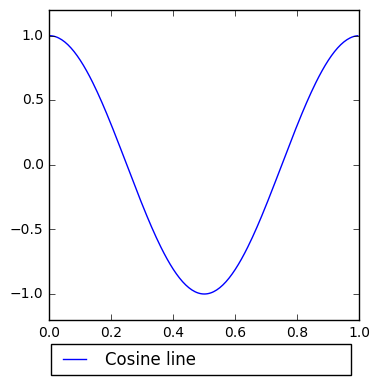

In [69]:
fdpi = 300
fig = plt.figure(figsize=(1200/fdpi, 1200/fdpi), dpi=fdpi)
ax = fig.add_subplot(111)
ax.set_xlim(0, 1.0)
ax.set_ylim(-1.2, 1.2)
ax.plot(x, y,label="Cosine line")

plt.legend(bbox_to_anchor=(-.02, -.05,1.02,0), loc=2, mode="expand")

<p>Here are some extreme examples to show the effect of each setting on the <code>bbox_to_anchor</code></p>

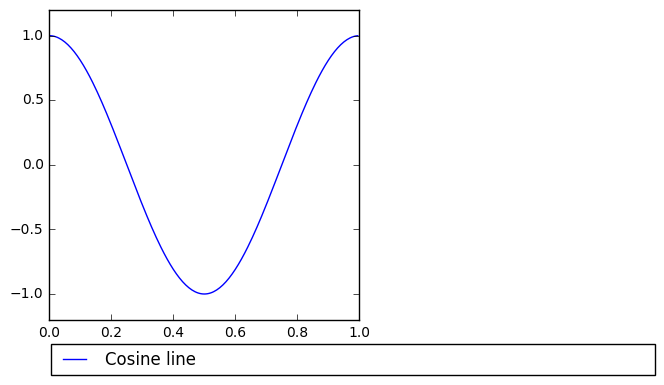

In [70]:
fdpi = 300
fig = plt.figure(figsize=(1200/fdpi, 1200/fdpi), dpi=fdpi)
ax = fig.add_subplot(111)
ax.set_xlim(0, 1.0)
ax.set_ylim(-1.2, 1.2)
ax.plot(x, y,label="Cosine line")

plt.legend(bbox_to_anchor=(-.02, -.05,2,0), loc=2, mode="expand")

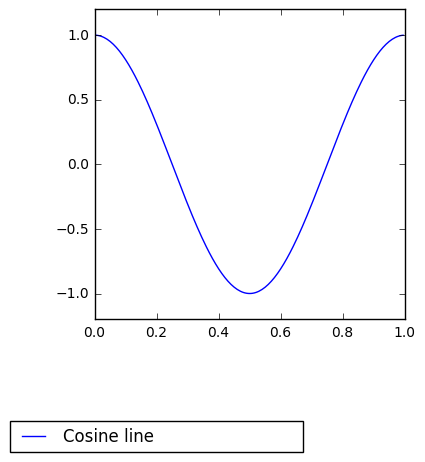

In [71]:
fdpi = 300
fig = plt.figure(figsize=(1200/fdpi, 1200/fdpi), dpi=fdpi)
ax = fig.add_subplot(111)
ax.set_xlim(0, 1.0)
ax.set_ylim(-1.2, 1.2)
ax.plot(x, y,label="Cosine line")

plt.legend(bbox_to_anchor=(-.3, -.3,1,0), loc=2, mode="expand")

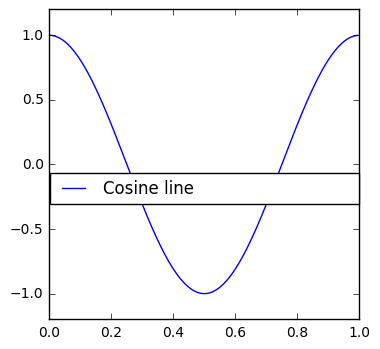

In [74]:
fdpi = 300
fig = plt.figure(figsize=(1200/fdpi, 1200/fdpi), dpi=fdpi)
ax = fig.add_subplot(111)
ax.set_xlim(0, 1.0)
ax.set_ylim(-1.2, 1.2)
ax.plot(x, y,label="Cosine line")

plt.legend(bbox_to_anchor=(-.025,0,1.05,.5), loc=2, mode="expand")

<p>Transformations is a complicated subject, because there are so many different coordinate systems involved. Hopefully having reviewed these here, you have a better understanding of them</p>

<p>Credit where credit is due. Much of this information is derived from the matplotlib help. Particularly these pages: https://matplotlib.org/users/transforms_tutorial.html and https://matplotlib.org/users/legend_guide.html</p>